## ML pipelines to data poisoning through the detection and exclusion of anomalous data points, ensuring the trustworthiness of deployed models.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Display dataset shapes
print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)


Training set shape: (50000, 32, 32, 3) (50000, 1)
Test set shape: (10000, 32, 32, 3) (10000, 1)


## Visulizations

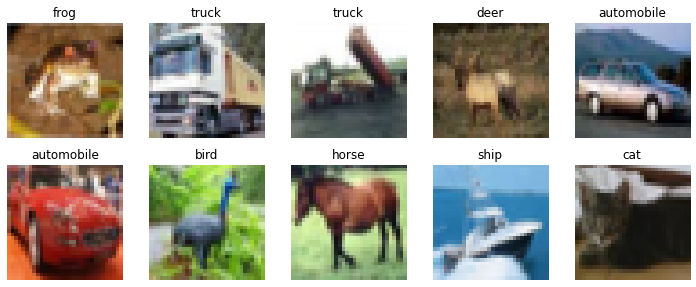

In [3]:

# Mapping class numbers to class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display a grid of images
def display_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display a grid of random images from the dataset
display_images(x_train, y_train)


## Data Preprocessing

In [6]:

from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Taking 10% of the data for train-test split
x_train, _, y_train, _ = train_test_split(x_train, y_train, test_size=0.9, random_state=42)

# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Combine training and test sets
x_combined = np.vstack([x_train_flat, x_test_flat])
y_combined = np.vstack([y_train, y_test])

# Normalize the data
x_combined = x_combined / 255.0  # Scaling pixel values between 0 and 1

# Train-test split for anomaly detection
x_train, x_test, _, _ = train_test_split(x_combined, y_combined, test_size=0.2, random_state=42)



## Isolation Forest Model

In [7]:
# Train Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
isolation_forest.fit(x_train)

# Predict anomalies on the test set
anomaly_preds = isolation_forest.predict(x_test)



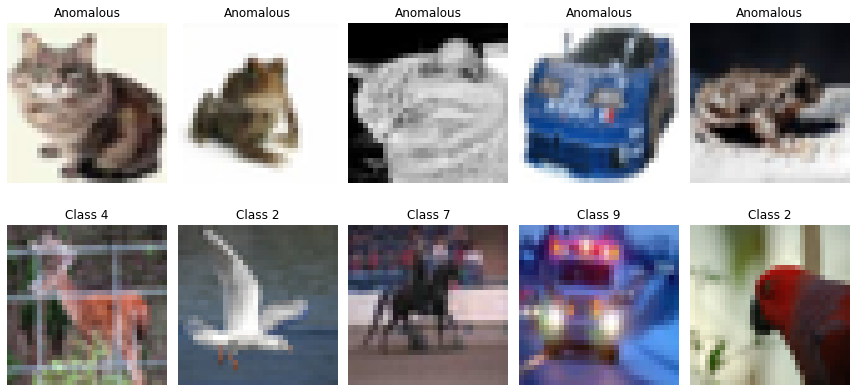

In [9]:
# Predict anomalies on the test set
anomaly_preds = isolation_forest.predict(x_test)

# Extract anomalous data indices from the test set
anomalous_indices = np.where(anomaly_preds == -1)[0]

# Displaying random anomalous images and samples from different classes
num_anomalous_images = 5
num_class_samples = 5

# Plotting anomalous images and samples from different classes for comparison
plt.figure(figsize=(12, 6))

# Plotting random anomalous images
for i in range(num_anomalous_images):
    idx = np.random.choice(anomalous_indices)
    plt.subplot(2, num_anomalous_images, i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))  # Reshape the flattened image to original shape
    plt.title('Anomalous')
    plt.axis('off')

# Plotting random samples from different classes
for i in range(num_class_samples):
    class_label = np.random.randint(0, 10)  # Random class label
    class_indices = np.where(y_combined == class_label)[0]
    random_sample = x_combined[np.random.choice(class_indices)]
    plt.subplot(2, num_class_samples, num_anomalous_images + i + 1)
    plt.imshow(random_sample.reshape(32, 32, 3))  # Reshape the flattened image to original shape
    plt.title(f'Class {class_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## One Class SVM

In [10]:
from sklearn.svm import OneClassSVM

# Fit One-Class SVM model
one_class_svm = OneClassSVM(nu=0.1)  # Adjust the hyperparameter 'nu' as needed
one_class_svm.fit(x_train)

# Predict anomalies on the test set
anomaly_preds = one_class_svm.predict(x_test)

# Extract anomalous data indices from the test set
anomalous_indices = np.where(anomaly_preds == -1)[0]

# Displaying random anomalous images and samples from different classes for comparison
num_anomalous_images = 5
num_class_samples = 5



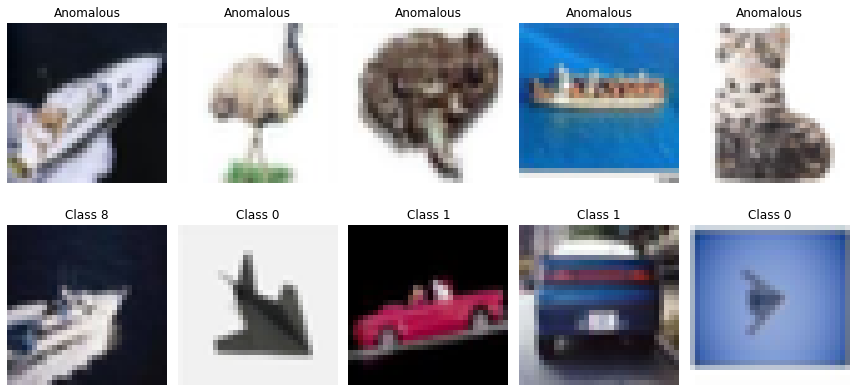

In [11]:
# Plotting anomalous images and samples from different classes for comparison
plt.figure(figsize=(12, 6))

# Plotting random anomalous images
for i in range(num_anomalous_images):
    idx = np.random.choice(anomalous_indices)
    plt.subplot(2, num_anomalous_images, i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))  # Reshape the flattened image to original shape
    plt.title('Anomalous')
    plt.axis('off')

# Plotting random samples from different classes
for i in range(num_class_samples):
    class_label = np.random.randint(0, 10)  # Random class label
    class_indices = np.where(y_combined == class_label)[0]
    random_sample = x_combined[np.random.choice(class_indices)]
    plt.subplot(2, num_class_samples, num_anomalous_images + i + 1)
    plt.imshow(random_sample.reshape(32, 32, 3))  # Reshape the flattened image to original shape
    plt.title(f'Class {class_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()
